# Multi-Layer Perceptron (MLP)

Multi-Layer Perceptron (MLP) is a supervised learning algorithm that learns

Multi—layer Perceptron (MLP) is a supervised learning algorithm that learns a funcltion $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where
$m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2,..., x_m}$
and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. Figure 1 below represents the functionalities of a MLP.





In [2]:
%%time
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import tensorflow as tf

# remove warnings
import warnings
warnings.filterwarnings('ignore')

# load data
tips = sns.load_dataset('tips')

# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Select features and target
X = tips.drop('tip', axis=1)
y = tips['tip']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # input layer
    tf.keras.layers.Dense(32, activation='relu'), # hidden layer
    tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test MAE: {mae}')
print(f'Test Loss: {loss}')

Epoch 1/100
7/7 [==============================] - 1s 2ms/step - loss: 8.7419 - mae: 2.6035
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 6.8973 - mae: 2.2105
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 5.3681 - mae: 1.8577
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 4.1105 - mae: 1.5571
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 3.1559 - mae: 1.3412
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 2.4203 - mae: 1.2039
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 1.9866 - mae: 1.1056
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 1.6966 - mae: 1.0400
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 1.5066 - mae: 0.9828
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 1.3938 - mae: 0.9425
Epoch 11/100
7/7 [==============================] - 0s 2ms/step - loss: 1.3233 

Epoch 1/100
7/7 [==============================] - 1s 31ms/step - loss: 10.1060 - mae: 2.8510 - val_loss: 6.2929 - val_mae: 2.2654
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 8.4678 - mae: 2.5574 - val_loss: 5.0984 - val_mae: 1.9907
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 7.1039 - mae: 2.2887 - val_loss: 4.0901 - val_mae: 1.7253
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 5.8776 - mae: 2.0154 - val_loss: 3.1952 - val_mae: 1.4639
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 4.7375 - mae: 1.7519 - val_loss: 2.4117 - val_mae: 1.2275
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 3.7250 - mae: 1.4971 - val_loss: 1.7949 - val_mae: 1.0411
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 2.9107 - mae: 1.2721 - val_loss: 1.3657 - val_mae: 0.9110
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 2.2716 - mae: 1.1033 - v

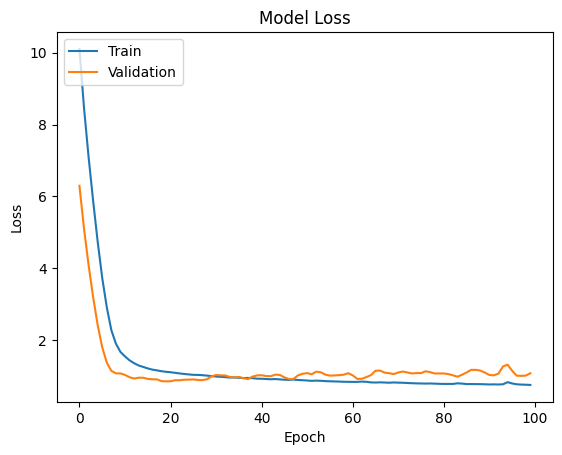

In [5]:

import matplotlib.pyplot as plt

# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # input layer
    tf.keras.layers.Dense(32, activation='relu'), # hidden layer
    tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
loss

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



## Early Stopping of Epochs

Epoch 1/100
7/7 [==============================] - 1s 63ms/step - loss: 11.6385 - mae: 3.1217 - val_loss: 7.0318 - val_mae: 2.4444
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 9.2421 - mae: 2.7292 - val_loss: 5.3505 - val_mae: 2.0741
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 7.3350 - mae: 2.3636 - val_loss: 3.9843 - val_mae: 1.7108
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 5.7053 - mae: 2.0079 - val_loss: 2.8608 - val_mae: 1.3825
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 4.3497 - mae: 1.6772 - val_loss: 2.0015 - val_mae: 1.0834
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 3.2119 - mae: 1.3880 - val_loss: 1.4207 - val_mae: 0.8858
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 2.3425 - mae: 1.1594 - val_loss: 1.1311 - val_mae: 0.8089
Epoch 8/100
7/7 [==============================] - 0s 8ms/step - loss: 1.7626 - mae: 1.0045 - v

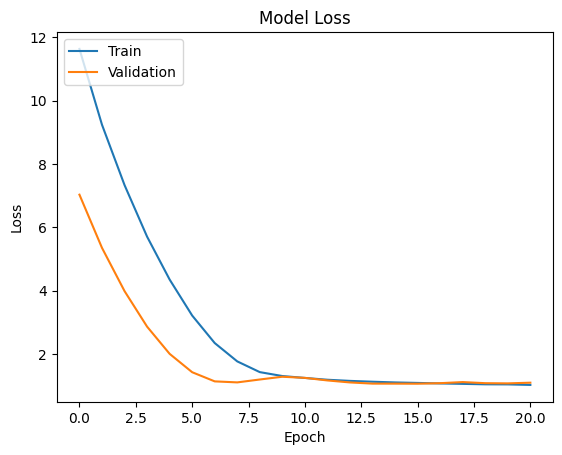

In [7]:

from tensorflow.keras.callbacks import EarlyStopping


import matplotlib.pyplot as plt

# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # input layer
    tf.keras.layers.Dense(32, activation='relu'), # hidden layer
    tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
loss

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

